In [361]:
#importing necessary libraries
import pandas as pd
import glob
import os
import warnings
import time
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
# importing custom scripts for different functions
sys.path.append('scripts')  # add scripts to path




# Ignore warnings
warnings.filterwarnings("ignore")

In [362]:
data = pd.read_csv("combined.csv")
data.head()

,Commodity,Classification,Grade,Sex,Market,Wholesale,Retail,Supply Volume,County,Date
0,Banana (Ripening),-,-,-,Mukuyu Market,-,50.00/Kg,NaN,Muranga,2026-02-11
1,Banana (Ripening),-,-,-,Mulot,70.00/Kg,100.00/Kg,1500.0,Bomet,2026-02-11
2,Banana (Ripening),-,-,-,Kitale Municipality Market,80.00/Kg,100.00/Kg,6000.0,Trans-Nzoia,2026-02-11
3,Banana (Ripening),-,-,-,Kerugoya,20.00/Kg,40.00/Kg,300.0,Kirinyaga,2026-02-10
4,Banana (Ripening),-,-,-,Bondeni,80.00/Kg,100.00/Kg,5000.0,Trans-Nzoia,2026-02-10


In [363]:
data.isnull().sum()

Commodity             0
Classification        0
Grade                 0
Sex                   0
Market                0
Wholesale             0
Retail                0
Supply Volume     17775
County               19
Date                  0
dtype: int64

In [364]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57010 entries, 0 to 57009
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       57010 non-null  object 
 1   Classification  57010 non-null  object 
 2   Grade           57010 non-null  object 
 3   Sex             57010 non-null  object 
 4   Market          57010 non-null  object 
 5   Wholesale       57010 non-null  object 
 6   Retail          57010 non-null  object 
 7   Supply Volume   39235 non-null  float64
 8   County          56991 non-null  object 
 9   Date            57010 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.3+ MB


In [365]:
data.duplicated().sum()

4259

In [366]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [367]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52751 entries, 0 to 52750
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       52751 non-null  object 
 1   Classification  52751 non-null  object 
 2   Grade           52751 non-null  object 
 3   Sex             52751 non-null  object 
 4   Market          52751 non-null  object 
 5   Wholesale       52751 non-null  object 
 6   Retail          52751 non-null  object 
 7   Supply Volume   36539 non-null  float64
 8   County          52743 non-null  object 
 9   Date            52751 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [368]:
data['County'] = data.groupby('Market')['County'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown"))

In [369]:
# Filling NaNs using the median volume for each specific commodity
data['Supply Volume'] = data.groupby(['Commodity', 'Market'])['Supply Volume'].transform(lambda x: x.fillna(x.median()))
#data['Supply Volume'] = data['Supply Volume'].fillna(0)

In [370]:
data.isnull().sum()

Commodity            0
Classification       0
Grade                0
Sex                  0
Market               0
Wholesale            0
Retail               0
Supply Volume     9251
County               0
Date                 0
dtype: int64

In [371]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52751 entries, 0 to 52750
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Commodity       52751 non-null  object 
 1   Classification  52751 non-null  object 
 2   Grade           52751 non-null  object 
 3   Sex             52751 non-null  object 
 4   Market          52751 non-null  object 
 5   Wholesale       52751 non-null  object 
 6   Retail          52751 non-null  object 
 7   Supply Volume   43500 non-null  float64
 8   County          52751 non-null  object 
 9   Date            52751 non-null  object 
dtypes: float64(1), object(9)
memory usage: 4.0+ MB


In [372]:
print(data["Wholesale"].unique())
print(data["Retail"].unique())

[' - ' '70.00/Kg' '80.00/Kg' ... '177.87/Kg' '100.11/Kg' '110.29/Kg']
['50.00/Kg' '100.00/Kg' '40.00/Kg' ... '189.57/Kg' '143.00/Kg'
 '6600.00/Kg']


In [373]:
def clean_price(series):
	clean_series = pd.to_numeric(series.astype(str).str.replace('[^0-9.]', '', regex=True), errors='coerce')
	return clean_series

data["Wholesale"] = clean_price(data["Wholesale"])
data["Retail"] = clean_price(data["Retail"])

# After cleaning, you should handle resulting NaNs before calculating margins
data["Wholesale"] = data["Wholesale"].fillna(0)
data["Retail"] = data["Retail"].fillna(0)

In [374]:
data= data.reset_index(drop=True) #

In [375]:
data= data.drop(columns=["Classification", "Grade", "Sex"])

In [376]:
data.describe()

,Wholesale,Retail,Supply Volume
count,52751.000000,52751.000000,4.350000e+04
mean,83.787029,148.441993,9.940613e+03
std,172.052412,394.632532,6.082019e+05
min,0.000000,0.000000,0.000000e+00
25%,17.500000,50.000000,5.000000e+02
50%,50.000000,92.500000,1.500000e+03
75%,100.000000,150.000000,3.500000e+03
max,14500.000000,22000.000000,1.000000e+08


In [377]:
# Calculate absolute price difference
data['Price_Margin'] = data['Retail'] - data['Wholesale']

# Calculate percentage margin, handling division by zero
data['Margin_Percentage'] = (data['Price_Margin'] / data['Wholesale'].replace(0, np.nan)) * 100

In [378]:
# Group by commodity to see average margins
profit_analysis = data.groupby('Commodity')['Price_Margin'].mean()

print("Top 5 Commodities by Price Margin:")
print(profit_analysis.head())

Top 5 Commodities by Price Margin:
Commodity
Banana (Cooking)               22.467655
Banana (Ripening)              21.811993
Beans (Yellow-Green)           79.411091
Beans Red Haricot (Wairimu)    65.417437
Cabbages                       16.214463
Name: Price_Margin, dtype: float64


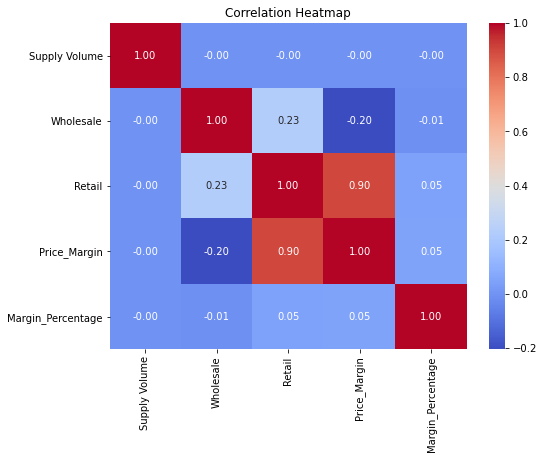

In [379]:
plt.figure(figsize=(8, 6))
correlation = data[['Supply Volume', 'Wholesale', 'Retail', 'Price_Margin', 'Margin_Percentage']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [380]:
data.head()

,Commodity,Market,Wholesale,Retail,Supply Volume,County,Date,Price_Margin,Margin_Percentage
0,Banana (Ripening),Mukuyu Market,0.0,50.0,NaN,Muranga,2026-02-11,50.0,NaN
1,Banana (Ripening),Mulot,70.0,100.0,1500.0,Bomet,2026-02-11,30.0,42.857143
2,Banana (Ripening),Kitale Municipality Market,80.0,100.0,6000.0,Trans-Nzoia,2026-02-11,20.0,25.000000
3,Banana (Ripening),Kerugoya,20.0,40.0,300.0,Kirinyaga,2026-02-10,20.0,100.000000
4,Banana (Ripening),Bondeni,80.0,100.0,5000.0,Trans-Nzoia,2026-02-10,20.0,25.000000


In [381]:
data.isnull().sum()

Commodity                0
Market                   0
Wholesale                0
Retail                   0
Supply Volume         9251
County                   0
Date                     0
Price_Margin             0
Margin_Percentage    11061
dtype: int64

In [382]:
# Sorting data by Date and Commodity
data = data.sort_values(['Commodity', 'Date'])

# Using linear interpolation to fill gaps in price trends
data['Retail'] = data.groupby('Commodity')['Retail'].transform(lambda x: x.interpolate(method='linear'))
data['Wholesale'] = data.groupby('Commodity')['Wholesale'].transform(lambda x: x.interpolate(method='linear'))

In [389]:
data['Price_Margin'] = data['Retail'] - data['Wholesale']
data['Margin_Percentage'] = (data['Price_Margin'] / data['Wholesale']) * 100

In [390]:
# Calculate Coefficient of Variation - a measure of volatility
volatility = data.groupby('Commodity')['Retail'].std() / data.groupby('Commodity')['Retail'].mean()
print("Top 5 Most Volatile Commodities (Hardest to predict):")
print(volatility.sort_values(ascending=False).head())

Top 5 Most Volatile Commodities (Hardest to predict):
Commodity
Banana (Cooking)               3.410440
Dry Maize                      3.229745
Beans Red Haricot (Wairimu)    3.049695
Beans (Yellow-Green)           2.927733
Finger Millet                  2.585517
Name: Retail, dtype: float64


In [391]:
# Create a 7-day lag (Price for 1 week)
data['Retail_Lag_7'] = data.groupby(['Commodity', 'Market'])['Retail'].shift(7)

# Create a Rolling Mean (Average of the last 7 days)
data['Retail_Rolling_7'] = data.groupby(['Commodity', 'Market'])['Retail'].transform(lambda x: x.rolling(window=7).mean())

# Checking the correlation of the lag vs the actual price
correlation = data[['Retail', 'Retail_Lag_7']].corr().iloc[0,1]
print(f"Correlation within 1 week: {correlation:.2f}")

Correlation within 1 week: 0.30


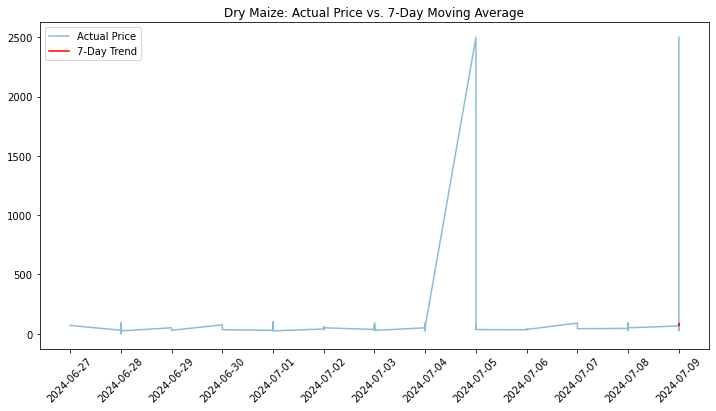

In [395]:
# Plotting the rolling mean against actual prices for a volatile commodity
maize_df = data[data['Commodity'] == 'Dry Maize'].head(100)

plt.figure(figsize=(12, 6))
plt.plot(maize_df['Date'], maize_df['Retail'], label='Actual Price', alpha=0.5)
plt.plot(maize_df['Date'], maize_df['Retail_Rolling_7'], label='7-Day Trend', color='red')
plt.title('Dry Maize: Actual Price vs. 7-Day Moving Average')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [393]:
# Check row counts per Market
market_counts = data['Market'].value_counts()
print("Top 5 Markets by Data Density:")
print(market_counts.head())

Top 5 Markets by Data Density:
Kitale Municipality Market    3121
Gikomba                       2883
Nairobi Supermarkets          2303
Kawangware                    1881
Ngurubani Market              1862
Name: Market, dtype: int64


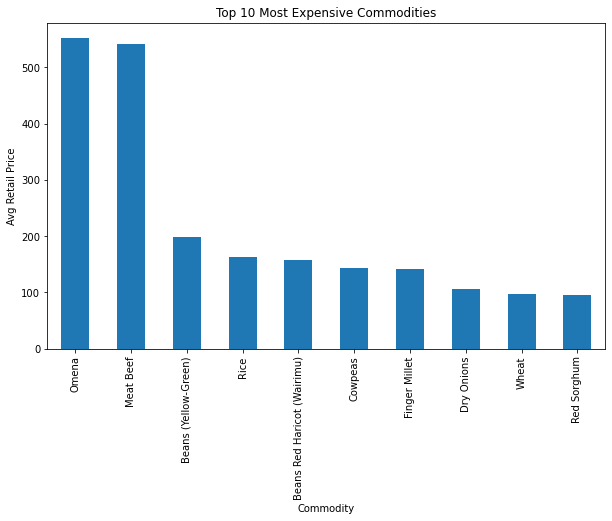

In [396]:
plt.figure(figsize=(10,6))
data.groupby('Commodity')['Retail'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel("Avg Retail Price")
plt.title("Top 10 Most Expensive Commodities")
plt.show()